In [37]:
%matplotlib inline

In [7]:
import pandas as pd
df = pd.read_csv("2016-Q1-Trips-History-Data.csv")

In [8]:
df.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


In [11]:
df.rename(columns=lambda x: x.replace(" ", "_").lower(), inplace=True)
df.rename(columns={'duration_(ms)': 'duration'}, inplace=True)
df.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered


In [15]:
df.tail()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
552394,782042,1/1/2016 0:16,1/1/2016 0:29,31266,11th & M St NW,31278,18th & R St NW,W22090,Registered
552395,213976,1/1/2016 0:15,1/1/2016 0:19,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Registered
552396,715013,1/1/2016 0:13,1/1/2016 0:25,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Registered
552397,448007,1/1/2016 0:10,1/1/2016 0:17,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Registered
552398,166066,1/1/2016 0:06,1/1/2016 0:09,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Registered


In [12]:
df.shape

(552399, 9)

In [14]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            552389, 552390, 552391, 552392, 552393, 552394, 552395, 552396,
            552397, 552398],
           dtype='int64', length=552399)

In [25]:
sdf = df.sample(int(len(df) * .1))
sdf.shape

(55239, 9)

In [26]:
%%time 

# df['start_date'] = pd.to_datetime(df.start_date)
# df['end_date'] = pd.to_datetime(df.end_date)

sdf['start_date'] = pd.to_datetime(sdf.start_date)
sdf['end_date'] = pd.to_datetime(sdf.end_date)

CPU times: user 23.1 s, sys: 173 ms, total: 23.3 s
Wall time: 24.1 s


In [28]:
sdf.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,bike_number,member_type
438736,634916,2016-01-28 20:38:00,2016-01-28 20:49:00,31101,14th & V St NW,31263,10th & K St NW,W21213,Registered
125950,136519,2016-03-19 06:48:00,2016-03-19 06:50:00,31248,Smithsonian / Jefferson Dr & 12th St SW,31247,Jefferson Dr & 14th St SW,W20885,Registered
245103,1078036,2016-03-07 08:33:00,2016-03-07 08:51:00,31400,Georgia & New Hampshire Ave NW,31234,20th & O St NW / Dupont South,W21382,Registered
49201,626893,2016-03-26 23:36:00,2016-03-26 23:46:00,31634,3rd & Tingey St SE,31605,3rd & D St SE,W01433,Registered
268433,285198,2016-03-03 07:41:00,2016-03-03 07:45:00,31253,19th & K St NW,31251,12th & L St NW,W00165,Registered


In [31]:
sdf.start_station.unique().size

365

## Top 10 Casual start station

In [38]:
casual = sdf[sdf.member_type == 'Casual'].start_station.value_counts().head(10)
casual

Lincoln Memorial                                    753
Jefferson Dr & 14th St SW                           573
Jefferson Memorial                                  301
Smithsonian / Jefferson Dr & 12th St SW             284
Maryland & Independence Ave SW                      208
New York Ave & 15th St NW                           194
Constitution Ave & 2nd St NW/DOL                    169
Ohio Dr & West Basin Dr SW / MLK & FDR Memorials    169
19th St & Constitution Ave NW                       148
Massachusetts Ave & Dupont Circle NW                138
Name: start_station, dtype: int64

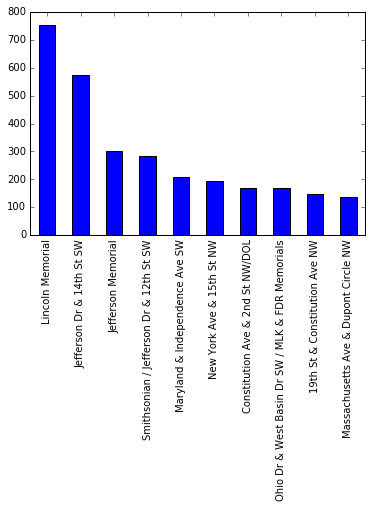

In [39]:
casual.plot(kind = 'bar')

## Top 10 Registered start station

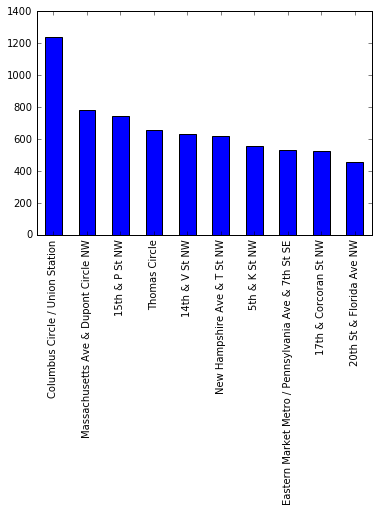

In [40]:
sdf[sdf.member_type == 'Registered'].start_station.value_counts().head(10).plot(kind = "bar")

In [33]:
sdf.member_type.unique()

array(['Registered', 'Casual'], dtype=object)

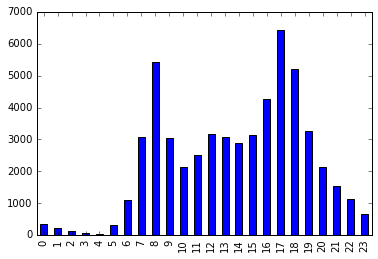

In [43]:
sdf.start_date.dt.hour.value_counts().sort_index().plot(kind = "bar")

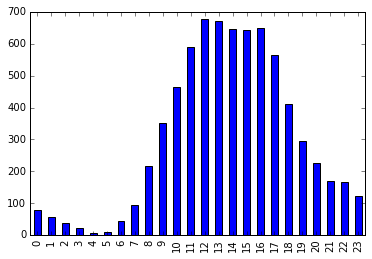

In [46]:
sdf[sdf.start_date.dt.dayofweek == 5].start_date.dt.hour.value_counts().sort_index().plot(kind = "bar")